In [2]:
from scipy.integrate import quad
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import patches
from cmath import rect
from matplotlib.colors import ListedColormap

import os
%matplotlib inline

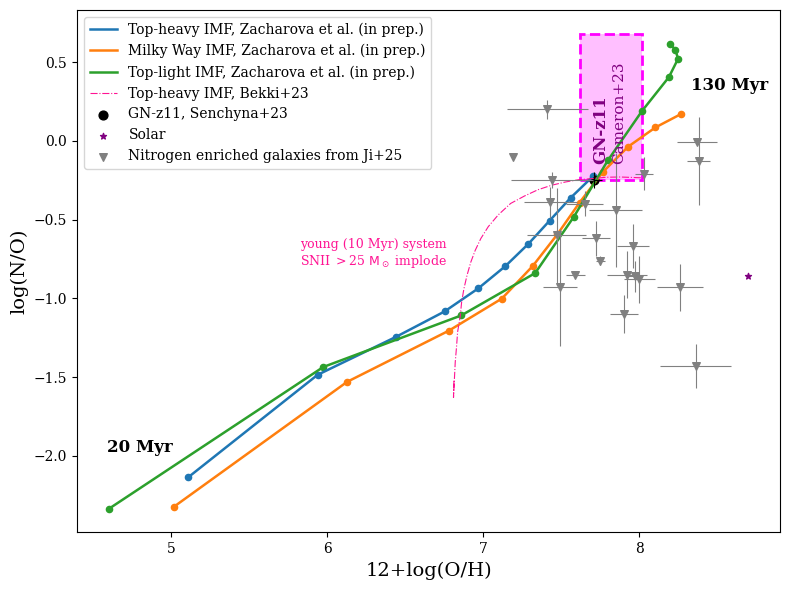

In [3]:
def load_file_paths(base_dir):
    file_paths = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file == "chemical_and_SN_evolution.txt":
                file_paths.append(os.path.join(root, file))
    return file_paths

def load_data_with_names(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data_dict = {}
    for i in range(len(lines)):
        line = lines[i].strip()
        if line.startswith("#"):
            row_name = line[1:].strip()
            if i + 1 < len(lines):
                data = list(map(float, lines[i + 1].strip().split()))
                data_dict[row_name] = data
    return data_dict

def recalculate(logNO, logOH): # Recalculate logNO and logOH
    logNO = [i - 0.86 for i in logNO]
    logOH = [i + 8.696 for i in logOH]
    return logNO, logOH

def fit(logOH, logNO): # Fit a polynomial to the data
    coefficients = np.polyfit(logOH, logNO, deg=6)
    polynomial = np.poly1d(coefficients)
    smooth_logOH = np.linspace(min(logOH[6:]), max(logOH[6:]), 500)
    smooth_logNO = polynomial(smooth_logOH)
    return smooth_logOH, smooth_logNO

def prepare_data(file_paths):
    for path in file_paths:
        data = load_data_with_names(path)
        logNO, logOH = data['Gas [N/O]:'], data['Gas [O/H]:']
        FeH, MgH, OH = data['Gas [Fe/H]:'], data['Gas [Mg/H]:'], data['Gas [O/H]:']
        timestep = data['time step list:']
        logNO_rec, logOH_rec = recalculate(logNO, logOH)
        smooth_logOH, smooth_logNO = fit(logOH_rec, logNO_rec)
    return smooth_logOH, smooth_logNO

def plot_high_redshift_gal_data():
    # Define data points: (12+O/H, N/O, label, color, err_x, err_y, age, age_err, agn?)
    points = [
        (8.38, -0.13, 'Mrk 996 (high density)', 0.075, 0.28),
        (8.36, -1.43, 'Mrk 996 (low density)', 0.225, 0.14),
        (8.03, -0.21, 'LyC', 0.06, 0.105),
        (8.00, -0.88, 'ID150880', 0.10, 0.15),
        ((7.15+7.67)/2, 0.20, 'UNCOvER-45924', 7.67-((7.15+7.67)/2), 0.06),
        (8.26, -0.93, 'ID1665', 0.15, 0.15),
        (7.92, -0.85, 'ID1746', 0.13, 0.15),
        (7.72, -0.62, 'ID1477', 0.09, 0.11),
        (7.75, -0.76, 'ID60001', 0.03, 0.03),
        (7.97, -0.86, 'EXCELS-121806', 0.04, 0.10),
        (7.90, -1.10, 'GS_3073 (low density)', 0.09, 0.12),
        (7.59, -0.85, 'GS_9422 (tentative)', 0.06, 0),
        (7.96, -0.67, 'ID397', 0.10, 0.14),
        (7.43, -0.39, 'RXJ2248-ID', 0.17, 0.10),
        (7.65, -0.40, 'GLASS_150008', 0.12, 0.08),
        (7.47, -0.6, 'A1703-zdk6', 0.19, 0.3),
        (7.85, -0.44, 'GN-z8-LAE', 0.17, 0.36),
        (8.37, -0.01, 'CEERS_01019 (AGN)', 0.13, 0),
        # (7.38, -0.59, 'GN-z9p4', 0.15, 0.24),
        (7.49, -0.93, 'GS-z9-0 light-weighted', 0.11, 0.37),
        # (7.49, -0.93, 'GS-z9-0 mass-weighted', 0.11, 0.37, 32e6, 20e6, True),
        ((6.69+7.69)/2, (-0.08-0.12)/2, 'GHZ9p', 0, 0),
        (7.44, -0.25, 'GHZ2/GLASS-z12', 0.26, 0.05) 
    ]

    handles = []
    for idx, (x, y, lab, xerr, yerr) in enumerate(points):
        # give a legend label only to the first plotted point so all points share one legend entry
        scatter_label = 'Nitrogen enriched galaxies from Ji+25' if idx == 0 else None
        sc = plt.scatter(x, y, color='gray', s=30, marker='v', zorder=4, label=scatter_label)
        plt.errorbar(x, y, xerr=[xerr] if isinstance(xerr, float) else [xerr], yerr=yerr, fmt='none', elinewidth=0.8, ecolor='gray', zorder=2)
        handles.append(sc)
    
def plot_Bekki_comparison():
    patha115 = "/Users/adriana_work/Desktop/galIMF/Bekki paper stolen plots/alpha115.csv"
    patha155 = "/Users/adriana_work/Desktop/galIMF/Bekki paper stolen plots/alpha155.csv"
    patha235 = "/Users/adriana_work/Desktop/galIMF/Bekki paper stolen plots/alpha235.csv"
    pathdwarf = "/Users/adriana_work/Desktop/galIMF/Bekki paper stolen plots/dwarf.csv"

    a115 = np.loadtxt(patha115, delimiter=',')
    a155 = np.loadtxt(patha155, delimiter=',')
    a235 = np.loadtxt(patha235, delimiter=',')
    dwarf = np.loadtxt(pathdwarf, delimiter=',')

    BlogOHa115 = a115[:, 0]
    BlogNOa115 = a115[:, 1]
    BlogOHa155 = a155[:, 0]
    BlogNOa155 = a155[:, 1]
    BlogOHa235 = a235[:, 0]
    BlogNOa235 = a235[:, 1]
    BlogOHdwarf = dwarf[:, 0]
    BlogNOdwarf = dwarf[:, 1] 

    plt.rc('font', family='serif')
    # plt.plot(BlogOHa155, BlogNOa155, color='palevioletred', lw=1.1, label='Bekki, $\\alpha=1.55$', linestyle=':')
    plt.plot(BlogOHa115, BlogNOa115, color='deeppink', lw=0.8, label='Top-heavy IMF, Bekki+23', linestyle='-.')
    plt.text(6.3, -0.7, 'young (10 Myr) system', color='deeppink', ha='center', va='bottom', fontsize=9)
    plt.text(6.3, -0.82, 'SNII $>$25 $\\rm M_\odot~$implode', color='deeppink', ha='center', va='bottom', fontsize=9)
    # plt.plot(BlogOHa235, BlogNOa235, color='crimson', lw=1, label='Bekki, $\\alpha=2.35$', linestyle='--')
    # plt.plot(BlogOHdwarf, BlogNOdwarf, color='darkmagenta', lw=1, label='Bekki, dwarf', linestyle='-.')
    xmin, xmax = 7.62, 8.02
    ymin, ymax = -0.25, 0.68
    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                         linewidth=2, facecolor='magenta',
                         alpha=0.25, zorder=0)
    plt.gca().add_patch(rect)
    rect1 = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                         linewidth=2, edgecolor='magenta', facecolor='none',
                         alpha=1, linestyle='--', zorder=0)
    plt.gca().add_patch(rect1)
    # plt.plot([7.82, 7.92], [-0.25, 0.25], color='purple', linestyle=':', linewidth=2, marker=None)
    plt.text(7.75, - 0.25 + 0.1, 'GN-z11', color='purple', ha='center', va='bottom', fontsize=12, rotation=90, weight="bold")
    plt.text(7.87, - 0.25 + 0.1, 'Cameron+23', color='purple', ha='center', va='bottom', fontsize=11, rotation=90)
    # plt.scatter(7.84, -0.38, color='black', label='GN-z11', s=30, marker='*') # from Senchyna23 https://arxiv.org/pdf/2303.04179 (gas + dust)
    plt.scatter(7.71, -0.25, color='black', label='GN-z11, Senchyna+23', s=40, marker='o') # gas-phase only (Senchyna23), BEAGLE line fitting
    plt.errorbar(7.71, -0.25, 0.05, 0.05, fmt='none', elinewidth=0.8, ecolor='black', zorder=2)
    plt.scatter(8.696, -0.86, color='purple', label='Solar', s=20, marker='*')
    # ax = plt.gca()
    # ax.axhline(-0.86, color='red', linestyle='--', linewidth=0.5, label='Solar')
    # ay = plt.gca()
    # ay.axvline(8.696, color='red', linestyle='--', linewidth=0.5)
    # plt.scatter(7.91, -0.2, color='red', label='GN-z11', s=30, marker='*')

  # Extend if needed
plt.rc('font', family='serif')
plt.figure(figsize=(8, 6))

file_paths = glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.1Log_SFR0.3SFEN100SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
index_x=3
index_y=13

for i, path in enumerate(file_paths):
    data = load_data_with_names(path)
    logNO, logOH = data['Gas [N/O]:'], data['Gas [O/H]:']
    time_steps = data['time step list:']
    stellar_ages = np.log10(time_steps)
    logNO, logOH = recalculate(logNO, logOH)
    plt.scatter(logOH[index_x:index_y], logNO[index_x:index_y], color='tab:blue', s=20)
    plt.plot(logOH[index_x:index_y], logNO[index_x:index_y], color='tab:blue', lw=1.8, label='Top-heavy IMF, Zacharova et al. (in prep.)')

plt.text(4.8, -2, '20 Myr', color='black', ha='center', va='bottom', fontsize=12, weight="bold")    
plt.text(8.575, 0.3, '130 Myr', color='black', ha='center', va='bottom', fontsize=12, weight="bold")    

file_paths = glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.3Log_SFR0.2SFEN100SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
index_x=2
index_y=13
for i, path in enumerate(file_paths):
    data = load_data_with_names(path)
    logNO, logOH = data['Gas [N/O]:'], data['Gas [O/H]:']
    time_steps = data['time step list:']
    stellar_ages = np.log10(time_steps)
    logNO, logOH = recalculate(logNO, logOH)
    plt.scatter(logOH[index_x:index_y], logNO[index_x:index_y], color='tab:orange', s=20)
    plt.plot(logOH[index_x:index_y], logNO[index_x:index_y], color='tab:orange', lw=1.8, label='Milky Way IMF, Zacharova et al. (in prep.)')


file_paths = glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.02alpha3.0Log_SFR-0.3SFEN100SFE0.0085Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
labels = ['Top-light IMF, Zacharova et al. (in prep.)']
index_x=2
index_y=13
title='Chemical evolution models with different IMF slopes'
filename='./phd_applications-plot.png'

for i, path in enumerate(file_paths):
    data = load_data_with_names(path)
    logNO, logOH = data['Gas [N/O]:'], data['Gas [O/H]:']
    time_steps = data['time step list:']
    stellar_ages = np.log10(time_steps)
    logNO, logOH = recalculate(logNO, logOH)
    # smooth_logOH, smooth_logNO = fit(logOH, logNO)
    label = labels[i] if labels and i < len(labels) else f"Run {i+1}"
    # plt.plot(smooth_logOH[index_x:index_y], smooth_logNO[index_x:index_y], color=colors[i % len(colors)], lw=0.8, label=label)
    plt.scatter(logOH[index_x:index_y], logNO[index_x:index_y], color='tab:green', s=20)
    plt.plot(logOH[index_x:index_y], logNO[index_x:index_y], color='tab:green', lw=1.8, label=label)
plot_Bekki_comparison()
plt.xlabel('12+log(O/H)', fontsize=14)
plt.ylabel('log(N/O)', fontsize=14)
#lgd2 = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    # lgd_obs = plot_high_redshift_gal_data()
    # plt.gca().add_artist(lgd_obs)
plot_high_redshift_gal_data()
plt.legend(fontsize=10)
#plt.title(title, fontsize=16)
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

["/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF-4.15alpha2.1log_SFR<module 'IMFs.Kroupa_IMF' from '/Users/adriana_work/Desktop/galIMF/IMFs/Kroupa_IMF.py'>SFEN0.3SFE0.0062Z_0100infall0.008/plots/SFH.txt", "/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF-4.15alpha2.3log_SFR<module 'IMFs.Kroupa_IMF' from '/Users/adriana_work/Desktop/galIMF/IMFs/Kroupa_IMF.py'>SFEN0.2SFE0.0061Z_0100infall0.0008/plots/SFH.txt", "/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF-4.15alpha3.0log_SFR<module 'IMFs.Kroupa_IMF' from '/Users/adriana_work/Desktop/galIMF/IMFs/Kroupa_IMF.py'>SFEN-0.3SFE0.0085Z_0100infall0.0008/plots/SFH.txt"]


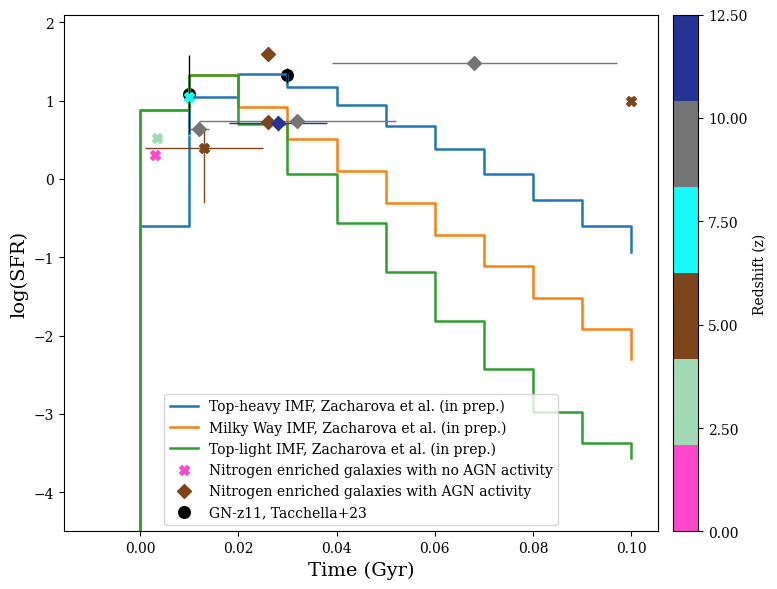

In [8]:
def plot_noeg_gal_sfr(ax=None):
    if ax is None:
        ax = plt.gca()
    points = [
        # now (age_yr, sfr, 'name', colour, age_err_yr, sfr_err, z, agn signatures?)
        (3e6, 2, 'Mrk 996 (low density)', 0.5e6, 0.0, 0.00544, False), #sfr from Ha luminosity, James+09
        (3.5e6, 3.3, 'LyC', 0.9e6, 0.11, 2.37, False), #Vanzella+21
        (100e6, 10, 'EXCELS-121806 - uncertain age', 0.0, 1, 5.225, False), #Arellano-Cordova+25
        #(250e6, 16, 'GS_3073 (low density)', cmap(12), 50e6, 14, 5.55, True), #sfr from [CII]λ158 because Ha strong agn contrubution, Übler+23, age of AGB stars from Ji+24b
        (26e6, 40, 'GS_9422 (tentative)', 0.0, 0.0, 5.943, True), #(t=t50*2), Tacchella+24 -> Simmonds+24 from SED
        (26e6, 5.4, 'GS_9422 (tentative)', 0.0, 0.1, 5.943, True), #(t=t50*2), Tacchella+24 -> Scholtz+23
        (13e6, 2.5, 'RXJ2248-ID', 12e6, 2.0, 6.1057, False), #Topping+24
        (10e6, 11.3, 'GN-z8-LAE', 0.0, 7.8, 8.279, False), #sfr from Ha, Navarro-Carrera+24
        (68e6, 30, 'CEERS_1019', 29e6, 1.5, 8.679, True), #mass-weighted age (t=t50*2), Larson+23, sfr from Hb
        #(10e6, 12, 'GN-z11', 0, 10, 10.6, True), #Tacchella+23
        #(30e6, 21, 'GN-z11', 0, 26, 10.6, True), #Tacchella+23
        (12e6, 4.34, 'GS-z9-0 light-weighted', 2e6, 0.1, 9.4327, True), #Curti+25
        (32e6, 5.5, 'GS-z9-0 mass-weighted', 20e6, 0.2, 9.4327, True), #Curti+25
        (28e6, 5.2, 'GHZ2/GLASS-z12', 10e6, 1.1, 12.34, True) #mass-weighted age, Castellano+24
        #(75e6, 19, 'JADES-GS-z14-0', cmap(6), 25e6, 0.0, 14.32, ?), #SED fitting, Carniani+25
    ]
    colors = ["#ff47ce", "#a1dab4", "#7d451b",  "#18f9f9", "#757575", "#253494"]
    my_cmap = ListedColormap(colors, name="my_cmap")
    norm = mcolors.Normalize(vmin=0, vmax=12.5)
    sm = plt.cm.ScalarMappable(norm=norm, cmap=my_cmap)
    sm.set_array([])
    handles = []
    added_agn = False
    added_noagn = False
    for idx, (age, sfr, label, age_err, sfr_err, z, agn_signatures) in enumerate(points):
        age = age/1e9
        age_err = age_err/1e9
        y = np.log10(sfr)
        point_color = my_cmap(norm(z))
        # compute asymmetric log errors from linear age errors (guard against age_err==0)
        if sfr_err and sfr_err > 0 and sfr > sfr_err:
            low = max(sfr - sfr_err, 1e-8)
            yerr_minus = y - np.log10(low)
            yerr_plus = np.log10(sfr + sfr_err) - y
            yerr_plot = np.array([[yerr_minus], [yerr_plus]])
        else:
            yerr_plot = None
        if agn_signatures is True:
            scatter_label_1 = 'Nitrogen enriched galaxies with AGN activity' if not added_agn else None
            sc_1 = ax.scatter(age, y, color=point_color, s=50, marker="D", zorder=4, label=scatter_label_1)
            ax.errorbar(age, y, xerr=age_err, yerr=yerr_plot, fmt='none', elinewidth=1, ecolor=point_color, zorder=3)
            handles.append(sc_1)
            added_agn = True
        else:
            scatter_label_2 = 'Nitrogen enriched galaxies with no AGN activity' if not added_noagn else None
            sc_3 = ax.scatter(age, y, color=point_color, s=50, marker="X", zorder=4, label=scatter_label_2)
            ax.errorbar(age, y, xerr=age_err, yerr=yerr_plot, fmt='none', elinewidth=1, ecolor=point_color, zorder=3)
            handles.append(sc_3)
            added_noagn = True
    fig = ax.figure
    cbar = fig.colorbar(sm, ax=ax, pad=0.02)
    tick_vals = np.linspace(0, 12.5, num=6)
    cbar.set_ticks(tick_vals)
    cbar.set_ticklabels([f"{t:.2f}" for t in tick_vals])
    cbar.set_label('Redshift (z)')
    ax.scatter(10e6/1e9, np.log10(12), s=70, marker='o', color = 'black', label='GN-z11, Tacchella+23')
    ax.errorbar(10e6/1e9, np.log10(12), xerr=0, yerr=0.5, fmt='none', elinewidth=1, ecolor='black', zorder=3)
    ax.scatter(30e6/1e9, np.log10(21), s=70, marker='o', color = 'black')
    ax.errorbar(30e6/1e9, np.log10(21), xerr=0, yerr=0.1, fmt='none', elinewidth=1, ecolor='black', zorder=3)
    
def plot_sfh_with_data(file_paths,labels, min, max):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('font', family='serif')
    colours = plt.get_cmap('tab10').colors
    for i, path in enumerate(file_paths):
        data = load_data_with_names(path)
        age_list, sfr = data['age_list'], data['SFR_list']
        age_list = np.array(age_list, dtype=float) - 0.01
        label = labels[i] if labels and i < len(labels) else f"Run {i+1}"
        ax.plot(age_list[min:max], sfr[min:max], lw=1.8, color=colours[i % len(colours)], label=label)
    ax.set_xlabel('Time (Gyr)', fontsize=14)
    ax.set_ylabel('log(SFR)', fontsize=14)
    ax.set_ylim(-4.5,2.1)
    #ax.set_title('Star Formation History', fontsize=16)

    plot_noeg_gal_sfr(ax=ax)
    ax.legend(fontsize=10)

    # leave room on the right for legends
    fig.tight_layout()
    fig.savefig('./phd_sfh-plot.png', bbox_inches='tight', dpi=300)
    plt.show()

sfh_path = glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF-4.15alpha2.1log_SFR<module 'IMFs.Kroupa_IMF' from '/Users/adriana_work/Desktop/galIMF/IMFs/Kroupa_IMF.py'>SFEN0.3SFE0.0062Z_0100infall0.008/plots/SFH.txt")
#sfh_path += glob.glob("./simulation_results_from_galaxy_evol/final_results/Kroupa_IMF.py'>SFEN0.6SFE0.0021Z_0100infall8e-05/plots/SFH.txt")
sfh_path += glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF-4.15alpha2.3log_SFR<module 'IMFs.Kroupa_IMF' from '/Users/adriana_work/Desktop/galIMF/IMFs/Kroupa_IMF.py'>SFEN0.2SFE0.0061Z_0100infall0.0008/plots/SFH.txt")
sfh_path += glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF-4.15alpha3.0log_SFR<module 'IMFs.Kroupa_IMF' from '/Users/adriana_work/Desktop/galIMF/IMFs/Kroupa_IMF.py'>SFEN-0.3SFE0.0085Z_0100infall0.0008/plots/SFH.txt")
sfh_path.sort()
print(sfh_path)
plot_sfh_with_data(sfh_path, labels=['Top-heavy IMF, Zacharova et al. (in prep.)', 'Milky Way IMF, Zacharova et al. (in prep.)', 'Top-light IMF, Zacharova et al. (in prep.)'], min=0, max=25)
